In [1]:
from __future__ import division
from functions import *
import matplotlib.pyplot as plt
import numpy as np
from surprise import SVD
from surprise import Dataset
from surprise import accuracy
from surprise import Reader
import pandas as pd

%matplotlib inline

In [2]:
# Load Data
Y_train = np.loadtxt('data/train.txt').astype(int)
Y_test = np.loadtxt('data/test.txt').astype(int)
M = max(max(Y_train[:,0]), max(Y_test[:,0])).astype(int) # users
N = max(max(Y_train[:,1]), max(Y_test[:,1])).astype(int) # movies
print("Factorizing with ", M, " users, ", N, " movies.")

Factorizing with  943  users,  1682  movies.


In [3]:
Y_train_df = pd.DataFrame(Y_train)
Y_test_df = pd.DataFrame(Y_test)

In [4]:
reader = Reader(line_format='user item rating', sep='\t')
data = Dataset.load_from_df(Y_train_df, reader)

test_data = Dataset.load_from_df(Y_test_df, reader)

trainset = data.build_full_trainset()
testset = test_data.build_full_trainset()
testset = testset.build_testset()

First, we try without any bias

In [5]:
algo = SVD(n_factors = 20, n_epochs = 300, biased = False, init_mean = 0, lr_all = 0.03, reg_all = 0.1, verbose = False)
algo.fit(trainset)

In [6]:
predictions = algo.test(trainset.build_testset())

# Then compute MSE
E_in = accuracy.rmse(predictions)**2

predictions = algo.test(testset)

# Then compute MSE
E_out = accuracy.rmse(predictions)**2

RMSE: 0.7371
RMSE: 0.9467


In [7]:
E_in

0.54332982617653713

In [8]:
E_out

0.89626665223374113

In [9]:
U = algo.pu
V = algo.qi

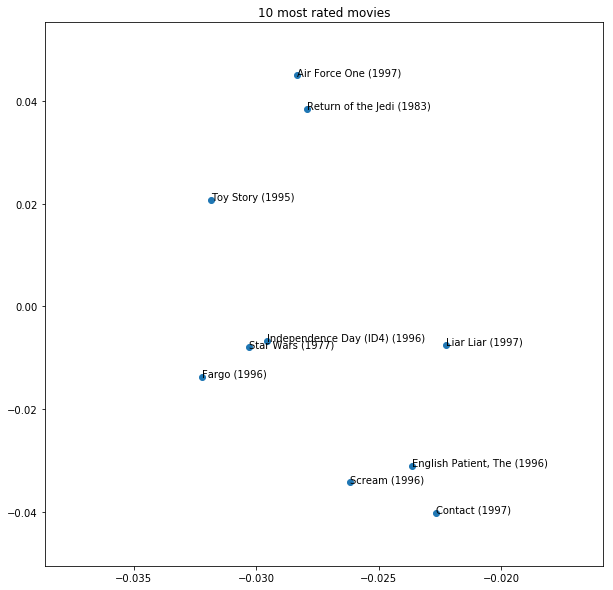

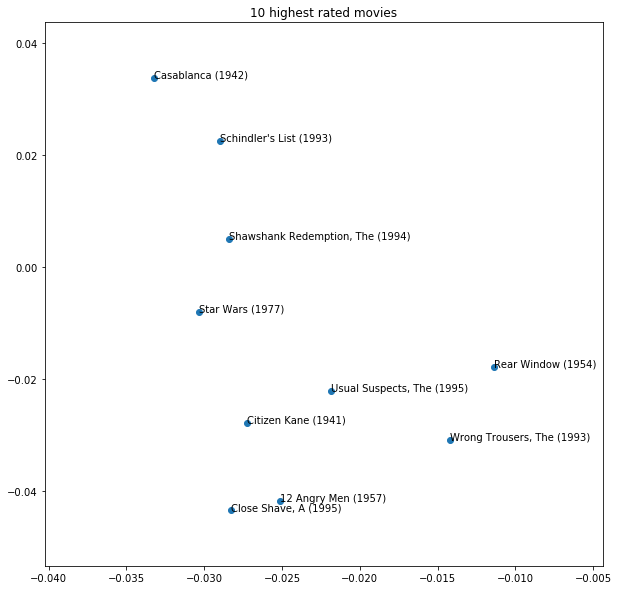

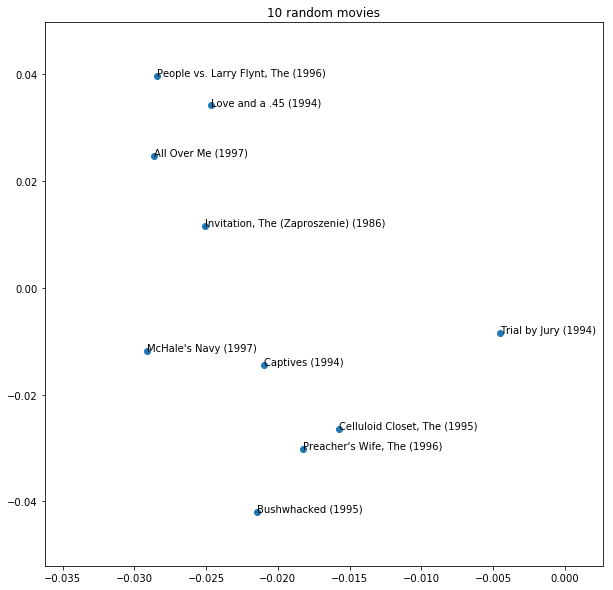

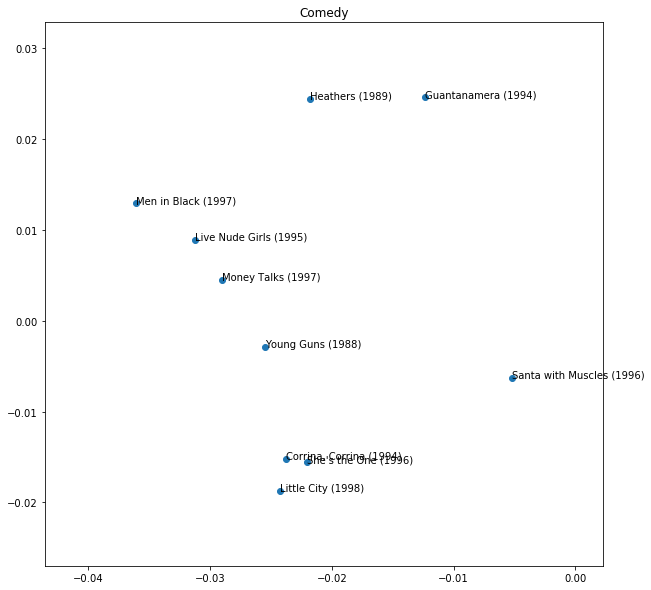

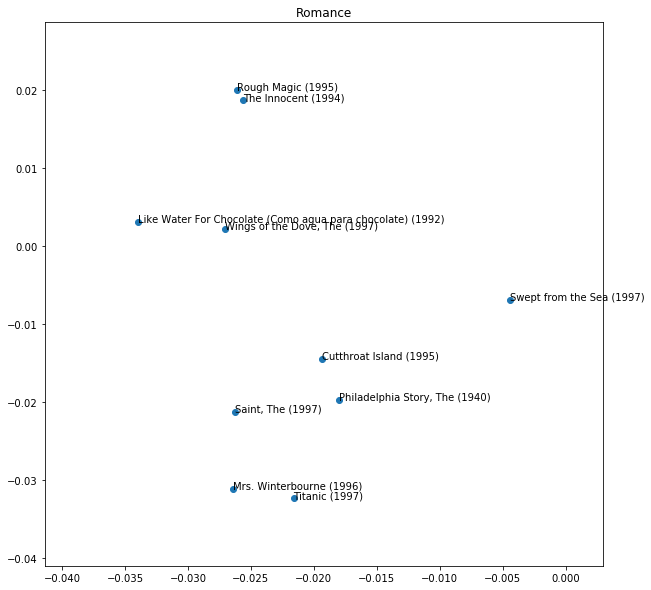

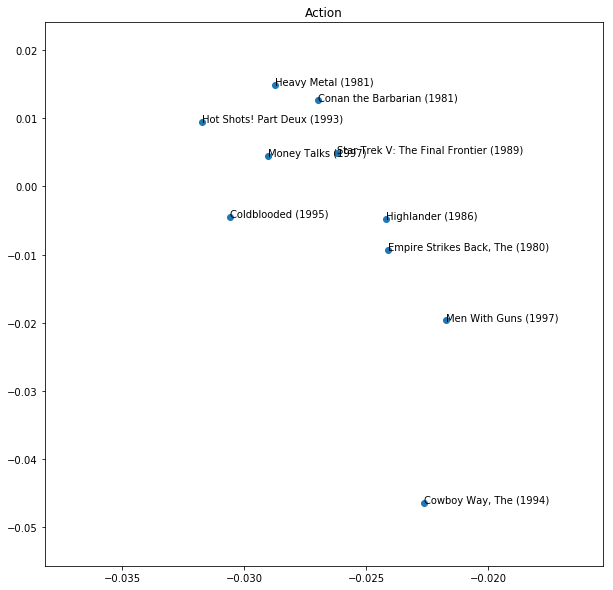

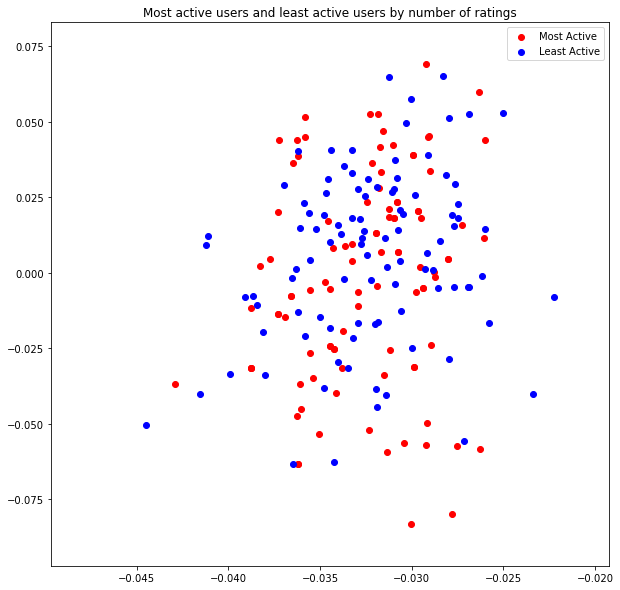

In [10]:
plot_all(U, V, 'surprise_no_bias')

Now we add the bias

In [11]:
algo = SVD(n_factors = 20, n_epochs = 300, biased = True, init_mean = 0, lr_all = 0.03, reg_all = 0.1, verbose = False)
algo.fit(trainset)

In [12]:
predictions = algo.test(trainset.build_testset())

# Then compute MSE
E_in = accuracy.rmse(predictions)**2

predictions = algo.test(testset)

# Then compute MSE
E_out = accuracy.rmse(predictions)**2

RMSE: 0.7025
RMSE: 0.9157


In [13]:
E_in

0.49352752760203988

In [14]:
E_out

0.83854613428019242

In [15]:
U = algo.pu
V = algo.qi

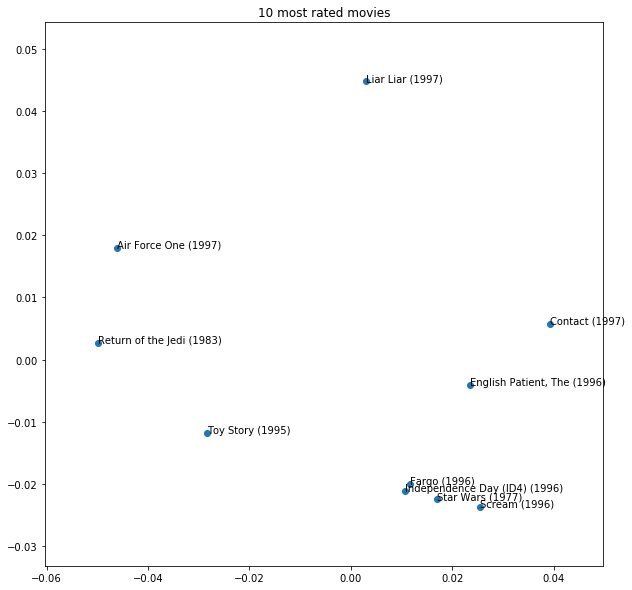

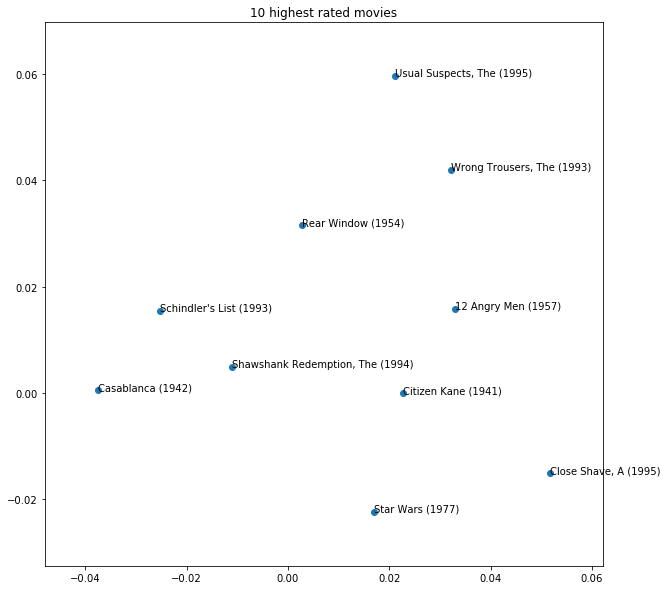

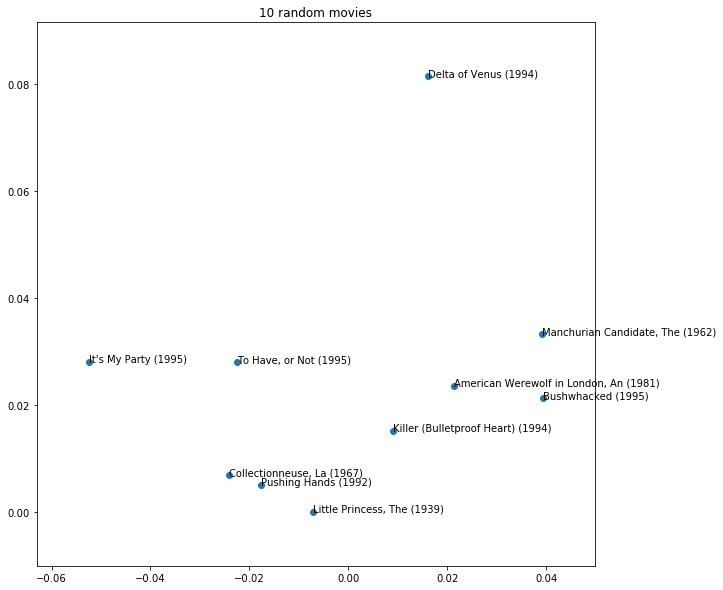

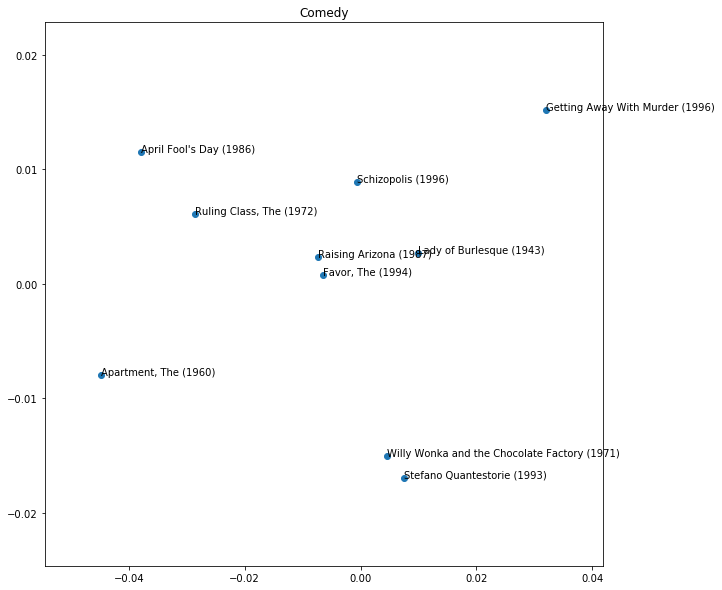

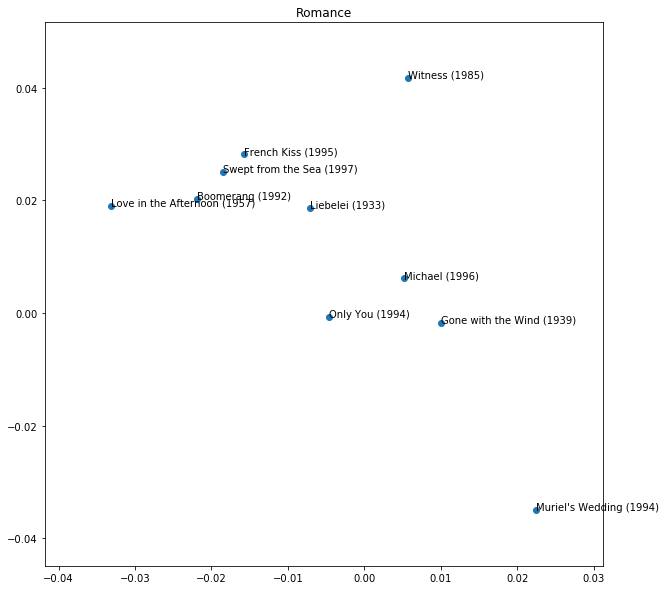

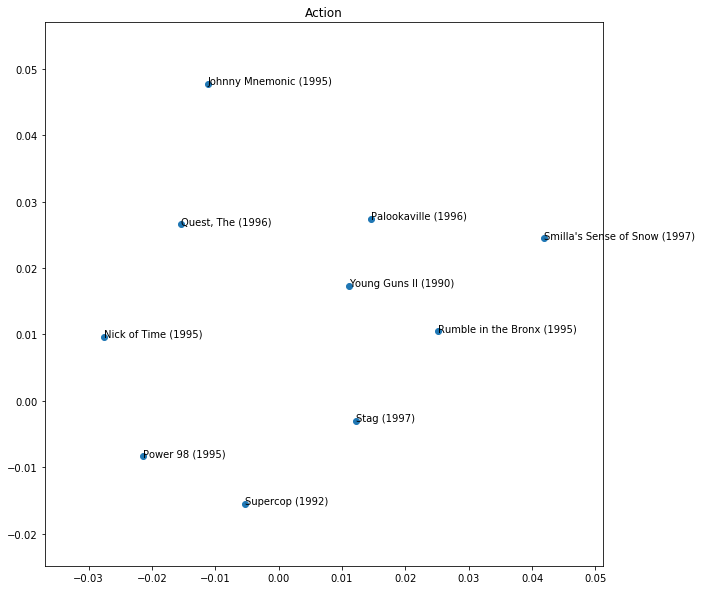

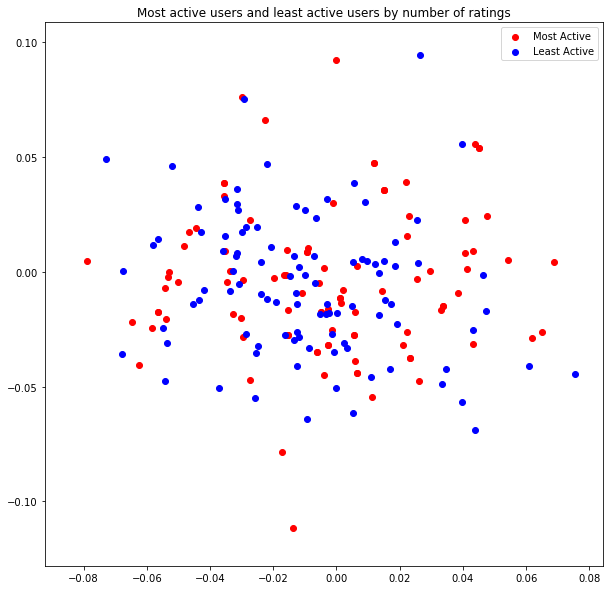

In [16]:
plot_all(U, V, 'surprise_with_bias')